In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn dependencies
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.utils import shuffle
from numpy import mean
from numpy import absolute
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# algorithms
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn import svm

In [2]:
#importing data and reading head

df=pd.read_csv(r'C:\Users\isarachchand\\Documents\git\apf\datasets\cyber_risk\data\malign_websites_dataset.csv')

df.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [4]:
df.isna().sum()  #missing values per column

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [5]:
100 * df['Type'].value_counts()/len(df)   #variable imbalance

0    87.871982
1    12.128018
Name: Type, dtype: float64

In [6]:
df.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


In [7]:
#unique categories for each categorical column

for i in df.select_dtypes(include='object').columns:
    print(f"{i} -> {df[i].nunique()}")

URL -> 1781
CHARSET -> 9
SERVER -> 239
WHOIS_COUNTRY -> 49
WHOIS_STATEPRO -> 182
WHOIS_REGDATE -> 891
WHOIS_UPDATED_DATE -> 594


In [8]:
df['CHARSET'].value_counts()

UTF-8           676
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
None              7
windows-1251      1
ISO-8859          1
windows-1252      1
Name: CHARSET, dtype: int64

In [9]:
# Top 5 categories kept

def CHARSET_CLEANER(x):
    if x not in ['UTF-8','ISO-8859-1','utf-8','us-ascii','iso-8859-1']:
        return "OTHERS"
    else:
        return x

In [10]:
df['CHARSET'] = df['CHARSET'].apply(CHARSET_CLEANER)

In [11]:
df['CHARSET'].value_counts()

UTF-8         676
ISO-8859-1    427
utf-8         379
us-ascii      155
iso-8859-1    134
OTHERS         10
Name: CHARSET, dtype: int64

In [12]:
df['SERVER'].value_counts()

Apache                                                                             386
nginx                                                                              211
None                                                                               175
Microsoft-HTTPAPI/2.0                                                              113
cloudflare-nginx                                                                    94
                                                                                  ... 
Apache/2.2.29 (Unix) mod_ssl/2.2.29 OpenSSL/1.0.1e-fips DAV/2 mod_bwlimited/1.4      1
gunicorn/19.7.1                                                                      1
Apache/2.2.31 (Unix) mod_ssl/2.2.31 OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4      1
Apache/1.3.37 (Unix) mod_perl/1.29 mod_ssl/2.8.28 OpenSSL/0.9.7e-p1                  1
Apache/2.2.16 (Debian)                                                               1
Name: SERVER, Length: 239, dtype: int64

In [13]:
# Top 5 categories kept

def SERVER_CLEANER(x):
    if x not in ['Apache','nginx','None','Microsoft-HTTPAPI/2.0','cloudflare-nginx']:
        return "OTHERS"
    else:
        return x

In [14]:
df['SERVER'] = df['SERVER'].apply(SERVER_CLEANER)

In [15]:
df['SERVER'].value_counts()

OTHERS                   802
Apache                   386
nginx                    211
None                     175
Microsoft-HTTPAPI/2.0    113
cloudflare-nginx          94
Name: SERVER, dtype: int64

In [16]:
df['WHOIS_STATEPRO'].value_counts()[:11]

CA            372
None          362
NY             75
WA             65
Barcelona      62
FL             61
Arizona        58
California     57
ON             45
NV             30
UT             29
Name: WHOIS_STATEPRO, dtype: int64

In [17]:
def STATE_CLEANER(x):
    if x not in ['CA','None','NY','WA','Barcelona','FL']:
        return "OTHERS"
    else:
        return x

In [18]:
df['WHOIS_STATEPRO'] = df['WHOIS_STATEPRO'].apply(STATE_CLEANER)


In [19]:
df['WHOIS_STATEPRO'].value_counts()

OTHERS       784
CA           372
None         362
NY            75
WA            65
Barcelona     62
FL            61
Name: WHOIS_STATEPRO, dtype: int64

In [20]:
def DATE_CLEANER(x):
    if x == 'None':
        return "Absent"
    else:
        return "Present"

In [21]:
df['WHOIS_REGDATE'] = df['WHOIS_REGDATE'].apply(DATE_CLEANER)

In [22]:
df['WHOIS_UPDATED_DATE'] = df['WHOIS_UPDATED_DATE'].apply(DATE_CLEANER)

In [23]:
df.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,Present,Absent,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,OTHERS,15087.0,None,None,Absent,Absent,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,Absent,Absent,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,OTHERS,Present,Present,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,OTHERS,Present,Present,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [24]:
#df.drop(['URL','WHOIS_COUNTRY'],axis=1,inplace=True)

<AxesSubplot:>

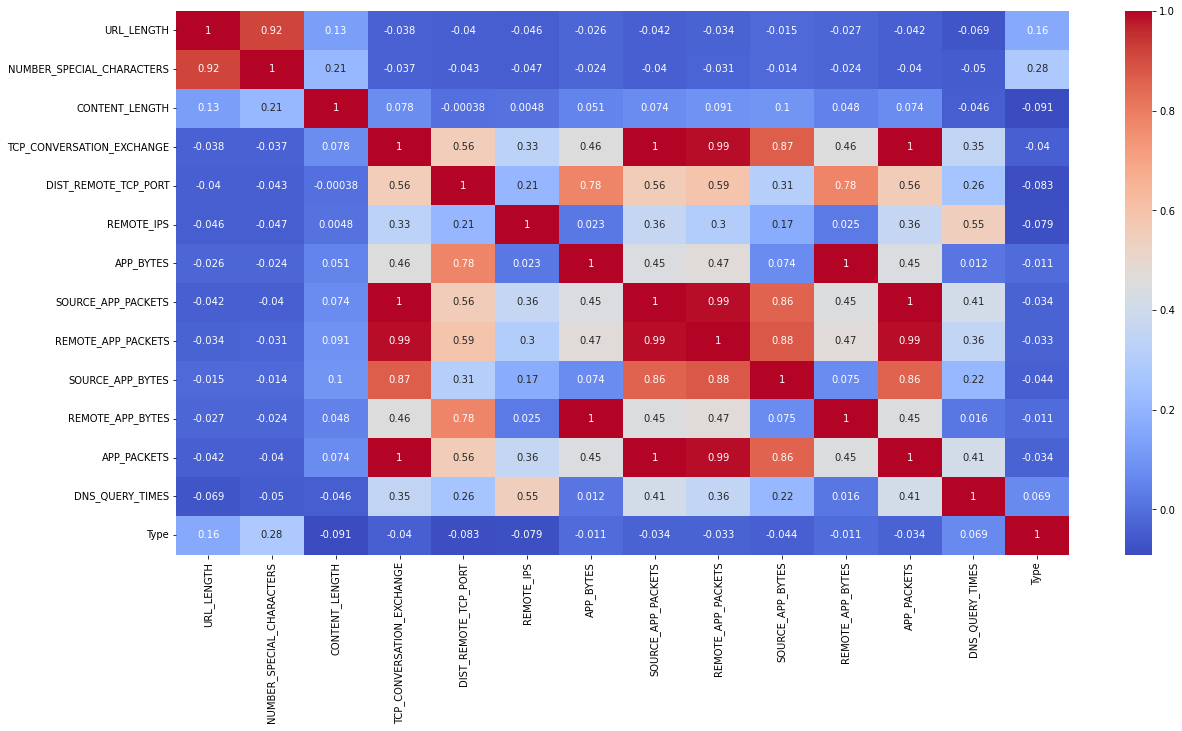

In [25]:
plt.figure(figsize=(20,10))


sns.heatmap(data=df.corr(),cmap='coolwarm',annot=True)
#sns.heatmap(data=df.corr(),cmap='coolwarm',annot=True)

In [26]:
df.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,Present,Absent,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,OTHERS,15087.0,None,None,Absent,Absent,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,Absent,Absent,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,OTHERS,Present,Present,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,OTHERS,Present,Present,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [27]:
df.drop(['URL','WHOIS_COUNTRY','CONTENT_LENGTH'],axis=1,inplace=True)
#df.drop("CONTENT_LENGTH",axis=1,inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL_LENGTH                 1781 non-null   int64  
 1   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 2   CHARSET                    1781 non-null   object 
 3   SERVER                     1781 non-null   object 
 4   WHOIS_STATEPRO             1781 non-null   object 
 5   WHOIS_REGDATE              1781 non-null   object 
 6   WHOIS_UPDATED_DATE         1781 non-null   object 
 7   TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 8   DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 9   REMOTE_IPS                 1781 non-null   int64  
 10  APP_BYTES                  1781 non-null   int64  
 11  SOURCE_APP_PACKETS         1781 non-null   int64  
 12  REMOTE_APP_PACKETS         1781 non-null   int64  
 13  SOURCE_APP_BYTES           1781 non-null   int64

In [29]:
# change null values to 0

df = df.fillna(0)

In [30]:
le = LabelEncoder()
for column in ['CHARSET','SERVER', 'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']:
    df[column] = le.fit_transform(df[column].astype(str))

In [31]:
df.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,3,5,4,1,0,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,2,3,4,0,0,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,4,1,4,0,0,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,0,5,5,1,1,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,2,2,5,1,1,57,2,5,4278,61,62,129889,4586,61,4.0,0


In [32]:
def cross_validate_train_test(X, y, clf):
    # cross validate for best train/test split
    cross_val_scores = []
    for i in range(2, 6):
        # cross validate within each split range
        scores = cross_val_score(clf, X, y, cv=i)
        cross_val_scores.append(scores)
        print("Cross Val Scores for", i, "partitions:", scores)

    best = -1
    best_index = 0
    partition_count = 0
    for idx, score_set in enumerate(cross_val_scores):
        max_score = max(score_set)
        if max_score > best:
            best = max_score
            best_index = np.where(score_set == best)[0][0]
            partition_count = idx + 2 # started at 2 partitions
        
    print("Best Accuracy Score: ", best, "at partion: ", best_index,  "with ", partition_count, 'partitions')
    return best, best_index, partition_count

### Initialise lists

In [33]:
# array to contain MAE
mae = []

# array to contain accuracies
accuracies_array = [] 


# Initialise LOOCV
cv = LeaveOneOut()

# models used
models_list = ['Naive Bayes', 'K-Nearest Neighbour', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM', 'K Means']

In [34]:
def mae_scores(model, X, y):
    cv = LeaveOneOut()
    
    scores = cross_val_score(clf, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    
    mae.append(mean(absolute(scores)))
    
    return mean(absolute(scores))


In [35]:
#function to plot confusion matrix

def plot_confusion_matrix(y_test, y_pred):
    
    #Generate the confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    print("The Confusion Matrix")
    print(cf_matrix)
    
    ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

    ax.set_title('Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    
    print("\n")
    # calculate precision
    precision = precision_score(y_test, y_pred, average='micro')
    print('Precision: %.3f' % precision)
    
    # calculate recall
    recall = recall_score(y_test, y_pred, average='binary')
    print('Recall: %.3f' % recall)
    
    # calculate F1 score
    score = f1_score(y_test, y_pred, average='binary')
    print('F-Measure: %.3f' % score)


## Naive Bayes

Cross Val Scores for 2 partitions: [0.34343434 0.43820225]
Cross Val Scores for 3 partitions: [0.25084175 0.37205387 0.4856661 ]
Cross Val Scores for 4 partitions: [0.23766816 0.34382022 0.2741573  0.46292135]
Cross Val Scores for 5 partitions: [0.23529412 0.31741573 0.32022472 0.45224719 0.45224719]
Best Accuracy Score:  0.4856661045531197 at partion:  2 with  3 partitions
Accuracy Score 0.4957841483979764
Mean absolute error is :  0.6861313868613139


The Confusion Matrix
[[213 292]
 [  7  81]]


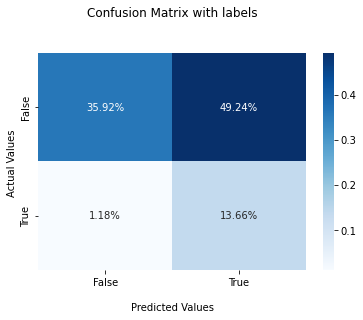



Precision: 0.496
Recall: 0.920
F-Measure: 0.351


In [36]:
#NAIVE BAYES

# seperate X and Y
y = df['Type']
X = df.drop('Type', axis=1)


#create classifier 
clf = MultinomialNB()

best, best_index, partition_count = cross_validate_train_test(X, y, clf)

# get train test split
partition_size = math.ceil(len(X) / partition_count)
test_start = best_index * partition_size
test_end = test_start + partition_size
test_x = X[test_start:test_end]
test_y = y[test_start:test_end]
train_x = pd.concat([X[:test_start],X[test_end:]])
train_y =  pd.concat([y[:test_start], y[test_end:]])

# train
clf.fit(train_x, train_y)

# predict on test data
pred = clf.predict(test_x)

# get accuracy
nb_accuracy_score = accuracy_score(pred, test_y)
print("Accuracy Score", nb_accuracy_score)

# get confusion_matrix
results = pd.DataFrame({
    'Predicted' : pred,
    'Actual' : test_y
})

# view mean absolute error
print("Mean absolute error is : ", mae_scores(clf, X, y))
print("\n")


accuracies_array.append(best)

# print confusion matrix
plot_confusion_matrix(test_y, pred)



## K-Nearest Neighbour

Cross Val Scores for 2 partitions: [0.88327722 0.86966292]
Cross Val Scores for 3 partitions: [0.8989899  0.8956229  0.93591906]
Cross Val Scores for 4 partitions: [0.90134529 0.90561798 0.93033708 0.93932584]
Cross Val Scores for 5 partitions: [0.88795518 0.90730337 0.88764045 0.94101124 0.95505618]
Best Accuracy Score:  0.9550561797752809 at partion:  4 with  5 partitions
Cross Val Scores for 2 partitions: [0.88439955 0.88089888]
Cross Val Scores for 3 partitions: [0.8956229  0.8956229  0.96627319]
Cross Val Scores for 4 partitions: [0.91479821 0.90786517 0.94157303 0.96179775]
Cross Val Scores for 5 partitions: [0.91036415 0.92977528 0.88764045 0.95224719 0.96348315]
Best Accuracy Score:  0.9662731871838112 at partion:  2 with  3 partitions
Cross Val Scores for 2 partitions: [0.88776655 0.86067416]
Cross Val Scores for 3 partitions: [0.88720539 0.88552189 0.9544688 ]
Cross Val Scores for 4 partitions: [0.90807175 0.89662921 0.92808989 0.96404494]
Cross Val Scores for 5 partitions: [

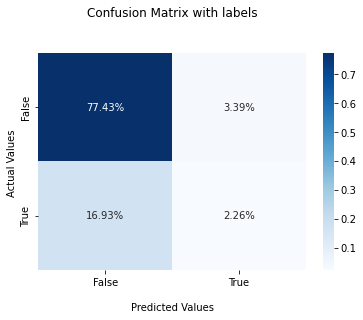



Precision: 0.797
Recall: 0.118
F-Measure: 0.182


In [37]:
#K-Nearest Neighbours

# seperate X and Y
y = df['Type']
X = df.drop('Type', axis=1)


#create classifier 
clf = KNeighborsClassifier()

# cross validate with num neighbors
scores = []
for k in range(1, 10):
    clf = KNeighborsClassifier(n_neighbors=k)
    scores.append(cross_validate_train_test(X, y, clf))
best_k = 1
for idx, (_best, _, _) in enumerate(scores):
    if idx == 0:
        continue
    k = idx + 1
    if _best > scores[best_k][0]:
        best_k = k


best, best_index, partition_count = scores[best_k]
print("BEST", best, best_k)

# get train test split
partition_size = math.ceil(len(X) / partition_count)
test_start = best_index * partition_size
test_end = test_start + partition_size
test_x = X[test_start:test_end]
test_y = y[test_start:test_end]
train_x = pd.concat([X[:test_start],X[test_end:]])
train_y =  pd.concat([y[:test_start], y[test_end:]])

# train
clf.fit(train_x, train_y)

# predict on test data
pred = clf.predict(test_x)

# get accuracy
knn_accuracy_score = accuracy_score(pred, test_y)
print("Accuracy Score", knn_accuracy_score)
# get confusion_matrix
results = pd.DataFrame({
    'Predicted' : pred,
    'Actual' : test_y
    
})

#view mean absolute error
print("Mean absolute error is : ", mae_scores(clf, X, y))
print("\n")

accuracies_array.append(best)

# print confusion matrix
plot_confusion_matrix(test_y, pred)

## Decision Tree

Cross Val Scores for 2 partitions: [0.12233446 0.82696629]
Cross Val Scores for 3 partitions: [0.14983165 0.8989899  0.69645868]
Cross Val Scores for 4 partitions: [0.20403587 0.91910112 0.90786517 0.13483146]
Cross Val Scores for 5 partitions: [0.43137255 0.91573034 0.89325843 0.86516854 0.20786517]
Best Accuracy Score:  0.9191011235955057 at partion:  1 with  4 partitions
Accuracy Score 0.9327354260089686
Mean absolute error is :  0.051094890510948905


The Confusion Matrix
[[381  22]
 [  8  35]]


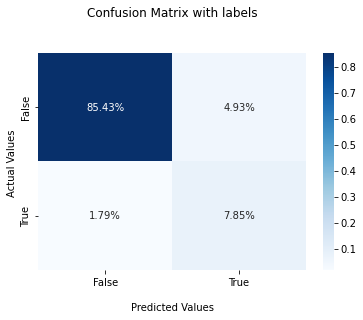



Precision: 0.933
Recall: 0.814
F-Measure: 0.700


In [38]:
#DECISION TREE

# seperate X and Y
y = df['Type']
X = df.drop('Type', axis=1)


#create classifier 
clf = DecisionTreeClassifier()

best, best_index, partition_count = cross_validate_train_test(X, y, clf)

# get train test split
partition_size = math.ceil(len(X) / partition_count)
test_start = best_index * partition_size
test_end = test_start + partition_size
test_x = X[test_start:test_end]
test_y = y[test_start:test_end]
train_x = pd.concat([X[:test_start],X[test_end:]])
train_y =  pd.concat([y[:test_start], y[test_end:]])

# train
clf.fit(train_x, train_y)

# predict on test data
pred = clf.predict(test_x)

# get accuracy
dt_accuracy_score = accuracy_score(pred, test_y)
print("Accuracy Score", dt_accuracy_score)
# get confusion_matrix
results = pd.DataFrame({
    'Predicted' : pred,
    'Actual' : test_y
})


#view mean absolute error
print("Mean absolute error is : ", mae_scores(clf, X, y))
print("\n")

accuracies_array.append(best)

# print confusion matrix
plot_confusion_matrix(test_y, pred)

## Random Forest

Cross Val Scores for 2 partitions: [0.87205387 0.87865169]
Cross Val Scores for 3 partitions: [0.91582492 0.8989899  0.57504216]
Cross Val Scores for 4 partitions: [0.67040359 0.91460674 0.89662921 0.42921348]
Cross Val Scores for 5 partitions: [0.62745098 0.94662921 0.90730337 0.93820225 0.44662921]
Best Accuracy Score:  0.9466292134831461 at partion:  1 with  5 partitions
Accuracy Score 0.9551820728291317
Mean absolute error is :  0.0364963503649635


The Confusion Matrix
[[314   2]
 [ 14  27]]


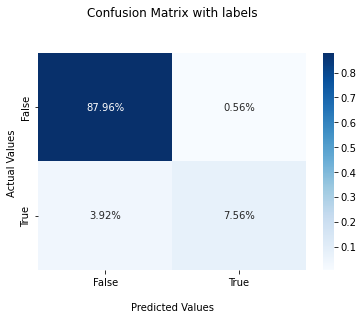



Precision: 0.955
Recall: 0.659
F-Measure: 0.771


In [39]:
#RANDOM FOREST 

# seperate X and Y
y = df['Type']
X = df.drop('Type', axis=1)


#create classifier 
clf = RandomForestClassifier()

best, best_index, partition_count = cross_validate_train_test(X, y, clf)

# get train test split
partition_size = math.ceil(len(X) / partition_count)
test_start = best_index * partition_size
test_end = test_start + partition_size
test_x = X[test_start:test_end]
test_y = y[test_start:test_end]
train_x = pd.concat([X[:test_start],X[test_end:]])
train_y =  pd.concat([y[:test_start], y[test_end:]])

# train
clf.fit(train_x, train_y)

# predict on test data
pred = clf.predict(test_x)

# get accuracy
rf_accuracy_score = accuracy_score(pred, test_y)
print("Accuracy Score", rf_accuracy_score)
# get confusion_matrix
results = pd.DataFrame({
    'Predicted' : pred,
    'Actual' : test_y
})

#view mean absolute error
print("Mean absolute error is : ", mae_scores(clf, X, y))
print("\n")

accuracies_array.append(best)

# print confusion matrix
plot_confusion_matrix(test_y, pred)

## Logistic Regression

In [ ]:
#LOGISTIC REGRESSION

# separate X and Y
y = df['Type']
X = df.drop('Type', axis=1)

# initialize logistic regression with a sufficiently high max_iter
logr = LogisticRegression( max_iter=500000)

best, best_index, partition_count = cross_validate_train_test(X, y, logr)

# get train test split
partition_size = math.ceil(len(X) / partition_count)
test_start = best_index * partition_size
test_end = test_start + partition_size
test_x = X[test_start:test_end]
test_y = y[test_start:test_end]
train_x = pd.concat([X[:test_start],X[test_end:]])
train_y =  pd.concat([y[:test_start], y[test_end:]])

# train
logr.fit(train_x, train_y)


# predict on test data
pred = logr.predict(test_x)

# get accuracy
lr_accuracy_score = accuracy_score(pred, test_y)
print("Accuracy Score", lr_accuracy_score)
# get confusion_matrix
results = pd.DataFrame({
    'Predicted' : pred,
    'Actual' : test_y
})

#view mean absolute error
print("Mean absolute error is : ", mae_scores(logr, X, y))
print("\n")
accuracies_array.append(best)

# print confusion matrix
plot_confusion_matrix(test_y, pred)

Cross Val Scores for 2 partitions: [0.87205387 0.87752809]
Cross Val Scores for 3 partitions: [0.9023569  0.88552189 0.85160202]
Cross Val Scores for 4 partitions: [0.91255605 0.88539326 0.88089888 0.88314607]
Cross Val Scores for 5 partitions: [0.92156863 0.91573034 0.87078652 0.91853933 0.90730337]
Best Accuracy Score:  0.9215686274509803 at partion:  0 with  5 partitions
Accuracy Score 0.8879551820728291


## SVM

In [ ]:
#SVM

# separate X and Y
y = df['Type']
X = df.drop('Type', axis=1)

# initialize SVM
clf = svm.SVC()

best, best_index, partition_count = cross_validate_train_test(X, y, logr)

# get train test split
partition_size = math.ceil(len(X) / partition_count)
test_start = best_index * partition_size
test_end = test_start + partition_size
test_x = X[test_start:test_end]
test_y = y[test_start:test_end]
train_x = pd.concat([X[:test_start],X[test_end:]])
train_y =  pd.concat([y[:test_start], y[test_end:]])

# train
clf.fit(train_x, train_y)


# predict on test data
pred = clf.predict(test_x)

# get accuracy
svm_accuracy_score = accuracy_score(pred, test_y)
print("Accuracy Score", svm_accuracy_score)
# get confusion_matrix
results = pd.DataFrame({
    'Predicted' : pred,
    'Actual' : test_y
})

#view mean absolute error
print("Mean absolute error is : ", mae_scores(clf, X, y))
print("\n")

accuracies_array.append(best)

# print confusion matrix
plot_confusion_matrix(test_y, pred)

## K-Means

In [ ]:
# #K-Means

# # separate X and Y
# y = df['Type']
# X = df.drop('Type', axis=1)

# # initialize logistic regression with a sufficiently high max_iter
# clst = KMeans(n_clusters=2)

# best, best_index, partition_count = cross_validate_train_test(X, y, logr)

# train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25)

# # train
# clst.fit(X)

# # predict on test data
# pred = clst.predict(X)

# # get accuracy
# km_accuracy_score = accuracy_score(pred, y)
# print("Accuracy Score", km_accuracy_score)
# # get confusion_matrix
# results = pd.DataFrame({
#     'Predicted' : pred,
#     'Actual' : y
# })


# #view mean absolute error
# print("Mean absolute error is : ", mae_scores(clst, X, y))

# accuracies_array.append(best)

# # print confusion matrix
# plot_confusion_matrix(test_y, pred)

In [ ]:
lowest_mae = mae.index(min(mae))
lowest_mae = models_list[lowest_mae]

print("Model with lowest mean absolute error: ", lowest_mae)

best_model_acc = accuracies_array.index(max(accuracies_array))
best_model_acc = models_list[best_model_acc]

print("Model with the best accuracy : ", best_model_acc)